[View in Colaboratory](https://colab.research.google.com/github/Sun-Jiankun/TimeSeriesForecasting/blob/master/kaggle_two_sigma_RL.ipynb)

In [31]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')
# !ls "/content/drive/My Drive"

Mounted at /content/drive


In [32]:

# pip install kaggle 
!pip install kaggle

!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# make kaggle API accessible

# from googleapiclient.discovery import build
# import io, os
# from googleapiclient.http import MediaIoBaseDownload
# from google.colab import auth
# auth.authenticate_user()
# drive_service = build('drive', 'v3')
# results = drive_service.files().list(
#         q="name = 'kaggle.json'", fields="files(id)").execute()
# kaggle_api_key = results.get('files', [])
# filename = "~/.kaggle/kaggle.json"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
# fh = io.FileIO(filename, 'wb')
# downloader = MediaIoBaseDownload(fh, request)
# done = False
# while done is False:
#     status, done = downloader.next_chunk()
#     print("Download %d%%." % int(status.progress() * 100))
# os.chmod(filename, 600)

# !cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/kaggle.json

In [33]:
!kaggle datasets list

ref                                                      title                                         size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
lava18/google-play-store-apps                            Google Play Store Apps                         2MB  2018-09-18 20:49:49           4236  
census/total-business-inventories-and-sales-data         Total Business Inventories and Sales Data     21KB  2018-09-26 09:46:01            320  
neuromusic/avocado-prices                                Avocado Prices                               629KB  2018-06-06 05:28:35           8052  
blastchar/telco-customer-churn                           Telco Customer Churn                         172KB  2018-02-23 18:20:00           6582  
jenny18/honey-bee-annotated-images                       Annotated Honey Bee Images                    50MB  2018-09-16 23:4

In [0]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.4.4)


In [0]:
import pandas as pd

with pd.HDFStore("./train.h5","r") as train:
    df =  train.get("train")

In [0]:
len(df)

1710756

In [0]:
df.head()
df.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=111)

In [0]:
values = []
labels = []
for col in df.columns:
    labels.append(col)
    values.append(df[col].isnull().sum()) # 记录每一列的缺失值个数
    print(col,values[-1])
    # print(df[col].isnull())

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

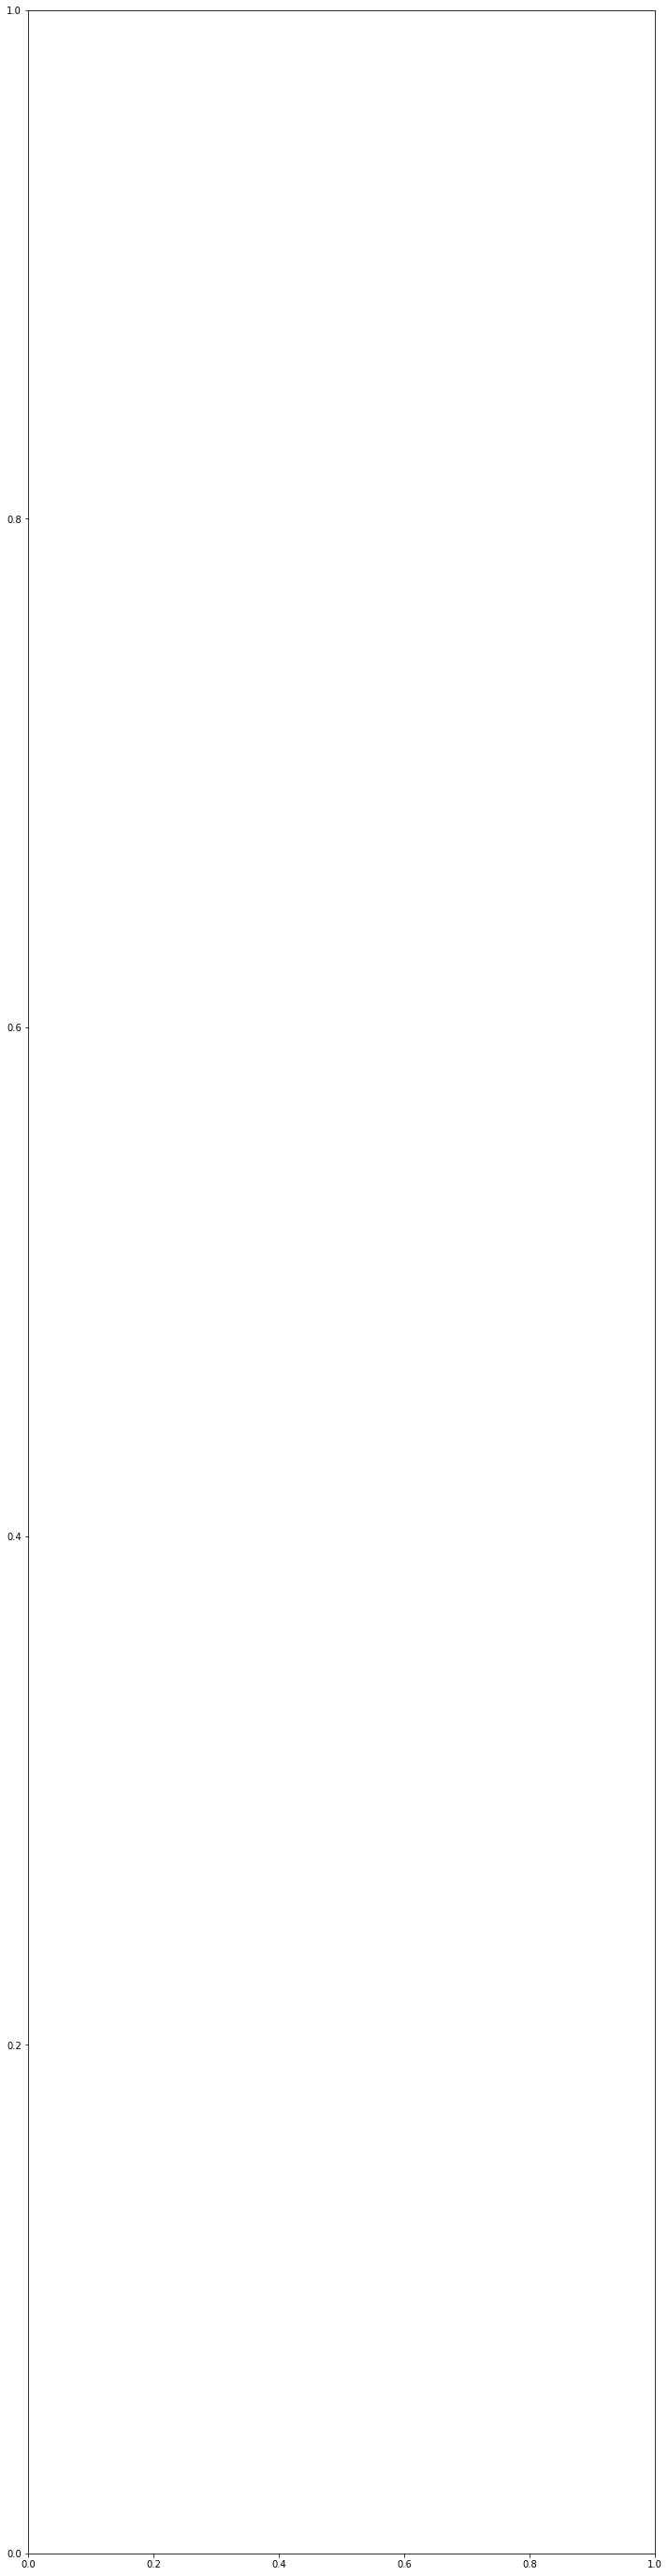

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 50))
rect = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+(width)/2.)